# MNIST
From Hands on Machine Learning chapter 3.

In [1]:
# Python ≥3.5 is required
import sys
import sklearn
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

/usr/local/lib/python3.8/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

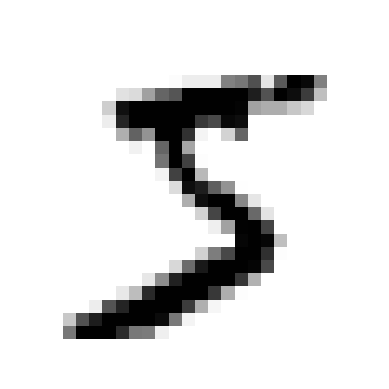

In [5]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

In [6]:
# the labels are strings
y[0]

'5'

In [7]:
# so cast to int
y = y.astype(np.uint8)

In [8]:
# MNIST data is pre-shuffled, so just split
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
# start with a binary classifier 5 / not-5
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [11]:
sgd_clf.predict([some_digit])

array([ True])

In [12]:
# measure the accuracy with cross-validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [13]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

3530
[[53892   687]
 [ 1891  3530]]


<AxesSubplot: >

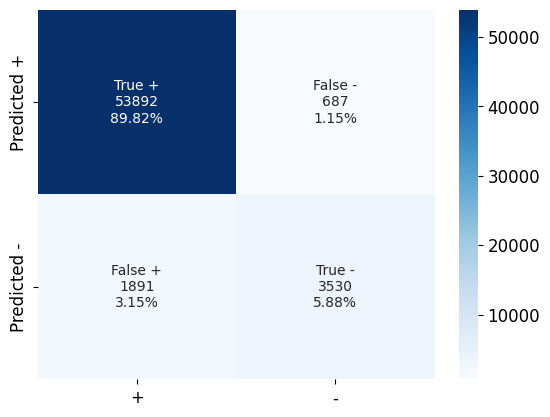

In [14]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_train_5, y_train_pred)
tn, fp, fn, tp = cf_matrix.ravel()

print(tp)
                 
print(cf_matrix)
group_names = ["True +","False -","False +","True -"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, xticklabels=['+', '-'], yticklabels=['Predicted +', 'Predicted -'], fmt='', cmap='Blues')

In [15]:
from sklearn.metrics import (precision_score, recall_score, f1_score)

# ratio of true positives to false positives
print(f"Precision: {precision_score(y_train_5, y_train_pred)}")


# ratio of true positives to false negatives
print(f"Recall: {recall_score(y_train_5, y_train_pred)}")


# F1 is the harmonic mean of precision and recall
print(f"F1: {f1_score(y_train_5, y_train_pred)}")

Precision: 0.8370879772350012
Recall: 0.6511713705958311
F1: 0.7325171197343846


In [16]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [17]:
y_train_pred

array([ True, False, False, ...,  True, False, False])